In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#improt the data
df=pd.read_csv('NYC_Jobs.csv')
df.head(1)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,542901,FIRE DEPARTMENT,Internal,1,Contract Voucher Associate,CLERICAL ASSOCIATE,Competitive-1,10251,04,"Finance, Accounting, & Procurement",...,NOTE: This position is open to applicants who ...,NON-CITY EMPLOYEES/EXTERNAL CANDIDATES PLEASE ...,NaN,NaN,NaN,New York City residency is generally required ...,07/29/2022,NaN,07/29/2022,08/16/2022


In [3]:
print(df.columns)

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')


In [4]:
# get the columns which are needed
jobs=df[['Business Title','Job Category','Full-Time/Part-Time indicator','Posting Type','Career Level','Salary Range From', 'Salary Range To','Preferred Skills','Hours/Shift']]

In [5]:
jobs['Career Level'].unique()

array(['Experienced (non-manager)', 'Entry-Level', 'Manager', 'Executive',
       'Student', nan], dtype=object)

In [119]:
# # get each level's full time mean salary
jobs[jobs['Full-Time/Part-Time indicator']=='F'].mean().tolist()

C:\Users\kzh19\AppData\Local\Temp/ipykernel_7892/702875493.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jobs[jobs['Full-Time/Part-Time indicator']=='F'].mean().tolist()


[63780.53689755384, 85895.52606362397]

In [112]:
len(jobs['Business Title'].unique())

1881

<AxesSubplot:xlabel='Job Category'>

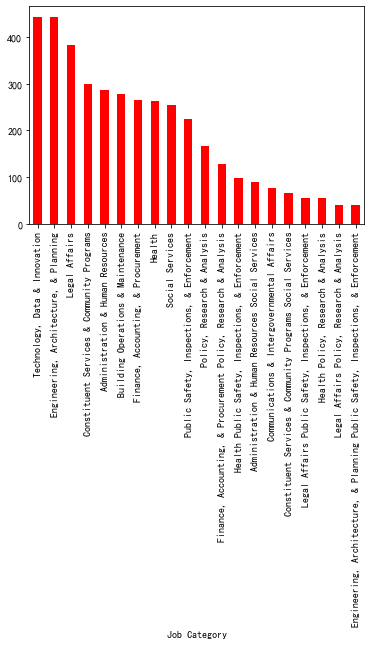

In [95]:
# top 20 needed job positions by Job Catgory

top_20_title=jobs.groupby('Job Category').count().sort_values(by=['Business Title'],ascending=False).head(20)
top_20_title
top_20_title.index.tolist()
top_20_title['Business Title'].plot.bar(color = 'r')

In [105]:
# analyst jobs percentage
len(jobs[jobs['Business Title'].str.lower().str.contains('analyst')]['Business Title'])/jobs.shape[0]

0.10148566645741787

<function matplotlib.pyplot.show(close=None, block=None)>

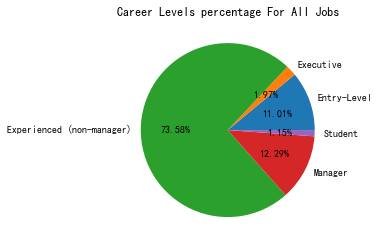

In [81]:
# percentage of each career level-----total
career_levels_number=jobs.groupby('Career Level').count()['Business Title'].tolist()
career_levels=jobs.groupby('Career Level').count().index.tolist()

plt.pie(career_levels_number,labels=career_levels,autopct='%1.2f%%')
plt.title('Career Levels percentage For All Jobs')
plt.show

#percentage of each career level----analyst


<function matplotlib.pyplot.show(close=None, block=None)>

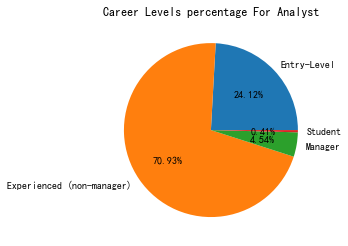

In [85]:
# analyst related jobs levels 
analyst_jobs=jobs[jobs['Business Title'].str.lower().str.contains('analyst')]
a_number=analyst_jobs.groupby('Career Level').count()['Business Title'].tolist()
a_levels=analyst_jobs.groupby('Career Level').count().index.tolist()

#plot
# plt.figure(figsize=(6,9))

plt.pie(a_number,labels=a_levels, autopct='%1.2f%%')
plt.title('Career Levels percentage For Analyst')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

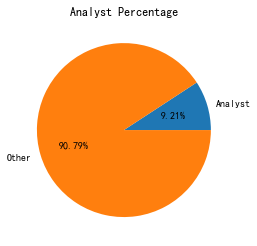

In [110]:
ss=[len(jobs[jobs['Business Title'].str.lower().str.contains('analyst')]['Business Title']),jobs.shape[0]]
l=['Analyst','Other']
plt.pie(ss,labels=l,autopct='%1.2f%%')
plt.title('Analyst Percentage')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

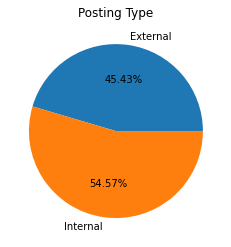

In [10]:
# external or internal jobs
x=jobs.groupby('Posting Type').count()['Business Title'].tolist()
labels=jobs.groupby('Posting Type').count().index.tolist()
plt.pie(x,labels=labels,autopct='%1.2f%%')
plt.title('Posting Type')
plt.show



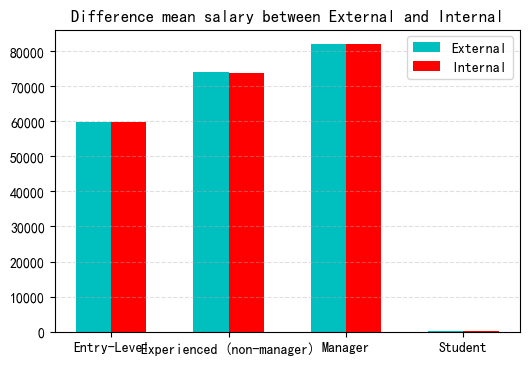

In [62]:
#difference between internal and external for analyst's mean salary range

p_type=jobs[jobs['Business Title'].str.lower().str.contains('analyst')].groupby(['Posting Type','Career Level']).mean()

# count external jobs mean salary range
p_x=p_type.loc['External']
p_x['Mean']=(p_x['Salary Range From']+p_x['Salary Range To'])/2

# count internal jobs mean salary range
p_i=p_type.loc['Internal']
p_i['Mean']=(p_i['Salary Range From']+p_i['Salary Range To'])/2

p_x_mean=p_x['Mean'].tolist()
p_i_mean=p_i['Mean'].tolist()
# plot the difference

plt.figure(dpi=100)
width=0.3

label=p_i.index.tolist()
x=np.arange(len(label)) 

plt.bar(x-width/2,p_x_mean,color = 'c',width=width,label='External')
plt.bar(x+width/2,p_i_mean,color = 'r',width=width,label='Internal')

plt.title('Difference mean salary between External and Internal')
plt.legend()
plt.grid(axis='y',alpha=0.4,ls='--')
plt.xticks(x,label)

plt.show()


C:\Users\kzh19\AppData\Local\Temp/ipykernel_7892/2328312580.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_mean=jobs[jobs['Full-Time/Part-Time indicator']=='F'].mean().tolist()


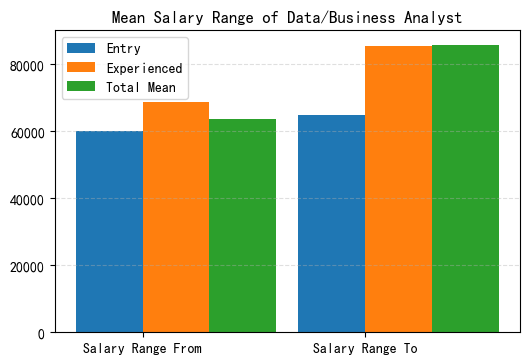

In [124]:
#data analyst jobs salary range
da=jobs[jobs['Business Title'].str.lower().str.contains('data analyst')]
ba=jobs[jobs['Business Title'].str.lower().str.contains('business analyst')]
da_jobs=da.append(ba)

da_mean=da_jobs.groupby('Career Level').mean()
entry=da_mean.loc['Entry-Level',].tolist()
experienced=da_mean.loc['Experienced (non-manager)',].tolist()
total_mean=jobs[jobs['Full-Time/Part-Time indicator']=='F'].mean().tolist()

plt.figure(dpi=100)
width=0.3

label=['Salary Range From','Salary Range To']
x=np.arange(len(label)) 

plt.bar(x-width/2,entry,width=width,label='Entry')
plt.bar(x+width/2,experienced,width=width,label='Experienced')
plt.bar(x+1.5*width,total_mean,width=width,label='Total Mean')

plt.title('Mean Salary Range of Data/Business Analyst')
plt.legend()
plt.grid(axis='y',alpha=0.4,ls='--')
plt.xticks(x,label)

plt.show()

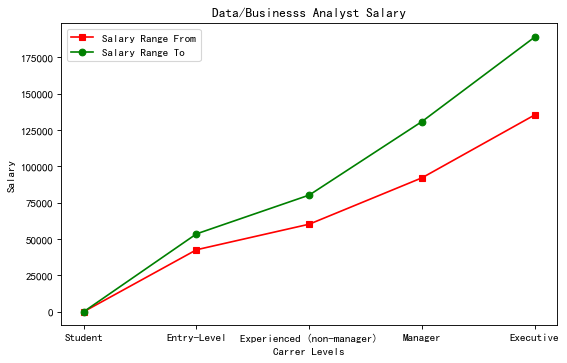

In [22]:
# Data/Businesss Analyst Salary for different career level
level_mean=jobs[jobs['Full-Time/Part-Time indicator']=='F'].groupby('Career Level').mean().sort_values('Salary Range From')
level_mean['Salary Range to'].tolist()
level_mean.index.tolist()



plt.figure(figsize=(8,5),dpi=80)
x = level_mean.index.tolist()
k1 = level_mean['Salary Range From'].tolist()
k2 = level_mean['Salary Range To'].tolist()
plt.plot(x,k1,'s-',color = 'r',label="Salary Range From")
plt.plot(x,k2,'o-',color = 'g',label="Salary Range To")
plt.xlabel("Carrer Levels")
plt.ylabel("Salary")
plt.title("Data/Businesss Analyst Salary")
plt.legend(loc = "best")
plt.show()

In [109]:
# analyst jobs
len(jobs[jobs['Business Title'].str.lower().str.contains('analyst')]['Business Title'])
jobs.shape[0]

4779